In [2]:
import pandas as pd
import seaborn.objects as so
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
df_train = pd.read_csv("./../data/train.csv")
df_test_nolabel = pd.read_csv("./../data/test_nolabel.csv")
df_sample_submission = pd.read_csv("./../data/sample_submission.csv")

/var/folders/9r/sd92rccj2_xbk8nkg4v7dcm00000gn/T/ipykernel_23822/1911879165.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("./../data/train.csv")


In [4]:
df_sample_submission

,id,Accept
0,63ef5dfc62f,0
1,65ee0569c05,0
2,19058f4da52,0
3,a0f1299afe4,0
4,e47da0be9fc,0
...,...,...
7045,78c2f0067d8,1
7046,279c7d23eb7,0
7047,d67af0ec109,0
7048,7d2e8114e9a,1


In [5]:
df_test_nolabel

,id,LoanNr_ChkDgt,Name,City,State,Bank,BankState,ApprovalDate,ApprovalFY,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross
0,63ef5dfc62f,1787644007,ERIC P. HAILE,STAFFORD,NY,MANUFACTURERS & TRADERS TR CO,NY,16-Jan-98,1998,1,2.0,0,0,1,0,N,Y,3-Apr-98,"$35,000.00",$0.00
1,65ee0569c05,6209123009,"TANNING BED, LTD.",WEST SENECA,NY,MANUFACTURERS & TRADERS TR CO,NY,9-Feb-94,1994,81,1.0,0,0,1,0,N,N,31-Jul-94,"$145,000.00",$0.00
2,19058f4da52,5033174010,BREITO COMPUTER SOLUTIONS INC,WOOD HAVEN (WOODHAVEN),NY,BANK OF AMERICA NATL ASSOC,RI,7-Nov-01,2002,4,1.0,1,5,1,1,Y,N,31-Dec-01,"$52,174.00",$0.00
3,a0f1299afe4,1578685008,Rasol Food Corporation,BRONX,NY,JPMORGAN CHASE BANK NATL ASSOC,IL,13-Dec-05,2006,6,2.0,3,6,0,1,Y,N,31-Jan-06,"$194,316.00",$0.00
4,e47da0be9fc,7146054004,MCKAY ARCHITECTURE AND DESIGN,NEW YORK,NY,FLUSHING BANK,NY,30-Jan-04,2004,3,1.0,0,3,1,1,Y,N,29-Feb-04,"$75,000.00",$0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,78c2f0067d8,5583904009,NASCO STONEWORKS INC,HUNTINGTON STATION (HUNTINGTON,NY,BANK OF AMERICA NATL ASSOC,RI,2-Aug-02,2002,2,1.0,0,2,1,1,0,N,31-Oct-02,"$30,000.00",$0.00
7046,279c7d23eb7,3264695007,"Yaworski's, Inc.",ROME,NY,FIRST NIAGARA BANK NATL ASSOC,NY,14-Nov-08,2009,5,2.0,0,5,0,1,N,N,31-Dec-08,$18.00,$0.00
7047,d67af0ec109,1890735004,RAWSON VALLEY FARMS LANDSCAPES,WALWORTH,NY,CITIZENS BANK NATL ASSOC,RI,23-Jun-06,2006,1,1.0,0,1,0,2,Y,N,31-Aug-06,"$23,762.00",$0.00
7048,7d2e8114e9a,8939464003,RAJ REALTY PA LLC,BROOKLYN,NY,FIRST NIAGARA BANK NATL ASSOC,NY,20-Jun-05,2005,2,1.0,0,2,1,1,Y,N,31-Mar-08,"$30,000.00",$0.00


In [6]:
df_train

,id,LoanNr_ChkDgt,Name,City,State,Bank,BankState,ApprovalDate,ApprovalFY,NoEmp,...,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,Accept
0,b353a0b461c,3354343008,"TOGETHER GARGOYLES, INC.",BROOKLYN,NY,JPMORGAN CHASE BANK NATL ASSOC,NY,21-Dec-88,1989,20,...,0,0,0,0,N,N,30-Apr-89,"$350,000.00",$0.00,1
1,cca24bbcc48,2349745003,LAWRENCE K. ALTHISER DBA LARRY,HARTWICK,NY,CITIZENS BANK NATL ASSOC,RI,23-Mar-07,2007,3,...,1,4,0,2,N,N,30-Apr-07,"$35,000.00",$0.00,1
2,e60644381ce,6007284009,TAAMEER CONSTRUCTION INC,BROOKLYN (BOROUGH OF NEW YORK),NY,JPMORGAN CHASE BANK NATL ASSOC,IL,9-Jan-03,2003,5,...,0,5,1,1,0,N,31-Jan-03,"$50,000.00",$0.00,1
3,ffca41a2760,6047703002,"CENTRAL CONTROL SYSTEMS, INC.",SYRACUSE,NY,MANUFACTURERS & TRADERS TR CO,NY,10-Nov-93,1994,25,...,0,0,1,0,N,N,31-Jan-94,"$190,000.00",$0.00,1
4,79e48255003,6590164004,METRO SALON,ROCHESTER,NY,MANUFACTURERS & TRADERS TR CO,NY,14-Aug-03,2003,6,...,0,0,1,1,0,Y,30-Sep-03,"$30,000.00",$0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40380,8db591edafe,1238924005,"NBFD, INC.",OLEAN,NY,COMMUNITY BANK NATL ASSOC,NY,15-May-97,1997,25,...,0,0,1,0,N,Y,3-Jun-97,"$50,000.00",$0.00,1
40381,e1e96f4af51,3681885006,Altman Stage Lighting Co.,YONKERS,NY,EH NATIONAL BANK,CA,7-Oct-09,2010,100,...,10,100,0,1,N,N,7-Oct-09,"$1,666,600.00",$0.00,1
40382,29aabac46d9,1497375007,Paws & Claws Pet Boutique LLC,SEAFORD,NY,HSBC BK USA NATL ASSOC,NY,13-Oct-05,2006,1,...,0,1,0,1,N,N,30-Apr-06,"$25,000.00",$0.00,1
40383,2ed947e57f5,1757175003,Bay Medical Supplies Inc,BROOKLYN,NY,HSBC BK USA NATL ASSOC,NY,10-Apr-06,2006,1,...,0,1,0,1,Y,N,31-May-06,"$73,363.00",$0.00,1


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40385 entries, 0 to 40384
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 40385 non-null  object 
 1   LoanNr_ChkDgt      40385 non-null  int64  
 2   Name               40382 non-null  object 
 3   City               40385 non-null  object 
 4   State              40385 non-null  object 
 5   Bank               40340 non-null  object 
 6   BankState          40338 non-null  object 
 7   ApprovalDate       40385 non-null  object 
 8   ApprovalFY         40385 non-null  object 
 9   NoEmp              40385 non-null  int64  
 10  NewExist           40378 non-null  float64
 11  CreateJob          40385 non-null  int64  
 12  RetainedJob        40385 non-null  int64  
 13  FranchiseCode      40385 non-null  int64  
 14  UrbanRural         40385 non-null  int64  
 15  RevLineCr          40250 non-null  object 
 16  LowDoc             403

In [8]:
df_train.isna().sum()

id                     0
LoanNr_ChkDgt          0
Name                   3
City                   0
State                  0
Bank                  45
BankState             47
ApprovalDate           0
ApprovalFY             0
NoEmp                  0
NewExist               7
CreateJob              0
RetainedJob            0
FranchiseCode          0
UrbanRural             0
RevLineCr            135
LowDoc                55
DisbursementDate     131
DisbursementGross      0
BalanceGross           0
Accept                 0
dtype: int64

In [9]:
df_train["id"].unique()

array(['b353a0b461c', 'cca24bbcc48', 'e60644381ce', ..., '29aabac46d9',
       '2ed947e57f5', '3725b629d32'], dtype=object)

In [10]:
df_train["LoanNr_ChkDgt"].unique()

array([3354343008, 2349745003, 6007284009, ..., 1497375007, 1757175003,
       2649655002])

In [11]:
df_train["Name"].unique()

array(['TOGETHER GARGOYLES, INC.', 'LAWRENCE K. ALTHISER DBA LARRY',
       'TAAMEER CONSTRUCTION INC', ..., 'Paws & Claws Pet Boutique LLC',
       'Bay Medical Supplies Inc', 'Miyaki, Inc.'], dtype=object)

In [12]:
df_train.groupby("Name").size().sort_values(ascending=False)

Name
SUBWAY                         69
DUNKIN DONUTS                  30
QUIZNO'S SUBS                  25
COLCHESTER HOLDINGS, INC.      14
QUIZNO'S                       14
                               ..
Fernando Garcia Productions     1
Fenix Us Perfume Inc.           1
Fenix U S Perfume Inc.          1
Feng Kee Trading, Inc           1
vs expo corp                    1
Length: 37615, dtype: int64

In [91]:
df_train["City_Extracted"] = df_train["City"].str.lower()

In [14]:
df_train.groupby("City_Extracted").size().sort_values(ascending=False)

City_Extracted
new york           5599
brooklyn           2690
rochester          1596
buffalo            1234
bronx               912
                   ... 
little york           1
living on manor       1
livingston            1
lloyd harbor          1
long city             1
Length: 2020, dtype: int64

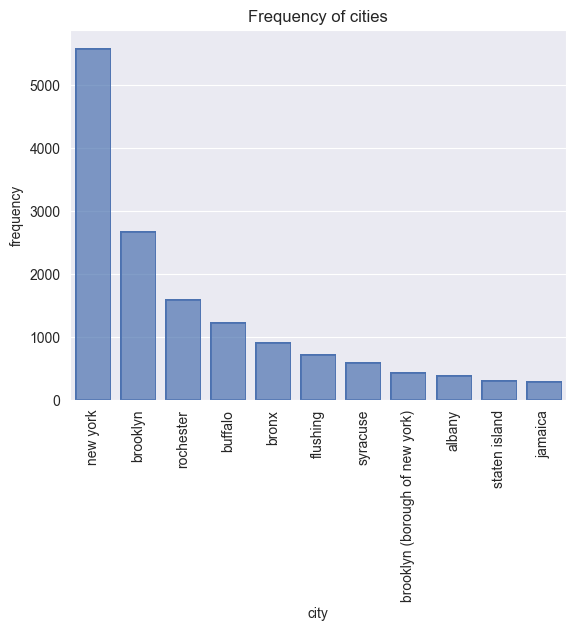

In [15]:

df_dataviz_01 = df_train.groupby("City_Extracted").size().sort_values(ascending=False).reset_index()
df_dataviz_01.columns = ["city", "frequency"]
df_dataviz_01_filtered = df_dataviz_01[df_dataviz_01["frequency"] > 300]

fig, ax = plt.subplots()
ax.xaxis.set_tick_params(rotation=90)

p = so.Plot(df_dataviz_01_filtered, x="city", y="frequency")\
    .add(so.Bar())\
    .label(title="Frequency of cities")\
    .layout(size=(8, 4))\
    .on(ax)\
    .plot()

In [54]:
df_train["State"].unique()

array(['NY'], dtype=object)

In [17]:
df_train.groupby("Bank").size().sort_values(ascending=False)

Bank
JPMORGAN CHASE BANK NATL ASSOC    6244
BANK OF AMERICA NATL ASSOC        6044
MANUFACTURERS & TRADERS TR CO     3805
HSBC BK USA NATL ASSOC            2976
FIRST NIAGARA BANK NATL ASSOC     2195
                                  ... 
METRO BANK OF DADE COUNTY            1
METRO BK & TR CO                     1
STAR BUS. & INDUST DEVEL             1
BUSINESS DEVEL CORP OF SO. CAR       1
BROADWAY NATIONAL BANK               1
Length: 311, dtype: int64

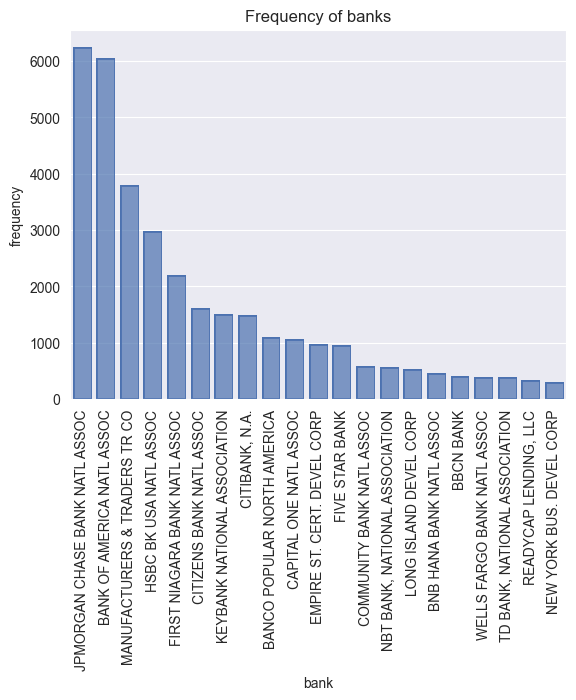

In [56]:
df_dataviz_02 = df_train.groupby("Bank").size().sort_values(ascending=False).reset_index()
df_dataviz_02.columns = ["bank", "frequency"]
df_dataviz_02_filtered = df_dataviz_02[df_dataviz_02["frequency"] > 300]

fig, ax = plt.subplots()
ax.xaxis.set_tick_params(rotation=90)

p = so.Plot(df_dataviz_02_filtered, x="bank", y="frequency")\
    .add(so.Bar())\
    .label(title="Frequency of banks")\
    .layout(size=(8, 4))\
    .on(ax)\
    .plot()

In [53]:
df_train.groupby("BankState").size().sort_values(ascending=False)


BankState
NY    19924
IL     5930
RI     4370
NC     2592
VA     1822
CA     1013
NJ      872
SD      836
CT      755
OH      722
DE      460
TX      327
SC      228
PA      144
PR       60
MA       51
NV       43
UT       37
VT       23
OR       18
ME       14
FL       14
MN       13
NH       13
WI       12
DC       12
MD        9
MO        5
TN        5
LA        4
CO        3
GA        2
NM        1
NE        1
KY        1
WA        1
AL        1
dtype: int64

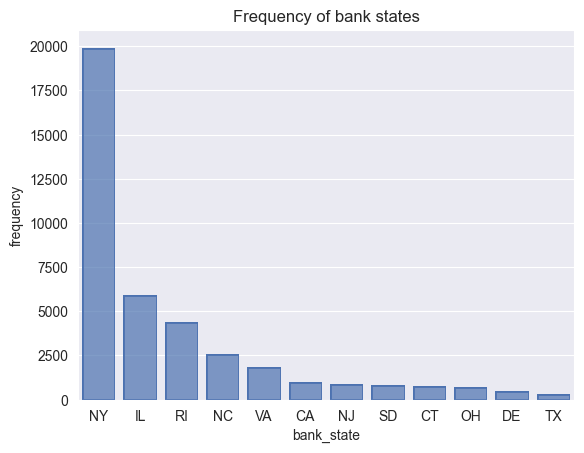

In [20]:
df_dataviz_03 = df_train.groupby("BankState").size().sort_values(ascending=False).reset_index()
df_dataviz_03.columns = ["bank_state", "frequency"]
df_dataviz_03_filtered = df_dataviz_03[df_dataviz_03["frequency"] > 300]

fig, ax = plt.subplots()
#ax.xaxis.set_tick_params(rotation=90)

p = so.Plot(df_dataviz_03_filtered, x="bank_state", y="frequency")\
    .add(so.Bar())\
    .label(title="Frequency of bank states")\
    .layout(size=(8, 4))\
    .on(ax)\
    .plot()

In [21]:
df_train["ApprovalDate"] = pd.to_datetime(df_train["ApprovalDate"])
df_train.groupby("ApprovalDate").size().sort_values(ascending=False)

ApprovalDate
2004-11-08    44
2005-04-18    39
2006-04-18    37
1993-07-07    36
2006-03-17    35
              ..
1991-06-24     1
1991-06-14     1
1991-06-06     1
1991-05-22     1
2072-12-05     1
Length: 6189, dtype: int64

In [22]:
df_train["ApprovalDate_Year"] = df_train["ApprovalDate"].dt.year
df_train["ApprovalDate_Month"] = df_train["ApprovalDate"].dt.month

df_train.groupby(["ApprovalDate_Year", "ApprovalDate_Month"]).size().sort_index(ascending=False)

ApprovalDate_Year  ApprovalDate_Month
2072               12                    1
                   11                    1
                   5                     2
                   4                     1
2070               12                    1
                                        ..
1974               3                     2
1973               10                    2
                   9                     1
                   8                     1
                   3                     2
Length: 457, dtype: int64

,year,month,frequency
0,2072,12,1
1,2072,11,1
2,2072,5,2
3,2072,4,1
4,2070,12,1
...,...,...,...
452,1974,3,2
453,1973,10,2
454,1973,9,1
455,1973,8,1


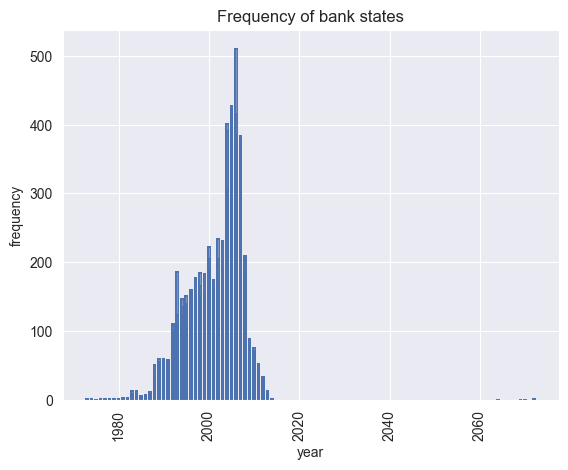

In [25]:
df_dataviz_04 = df_train.groupby(["ApprovalDate_Year", "ApprovalDate_Month"]).size().sort_index(ascending=False).reset_index()
df_dataviz_04.columns = ["year", "month", "frequency"]

fig, ax = plt.subplots()
ax.xaxis.set_tick_params(rotation=90)

p = so.Plot(df_dataviz_04, x="year", y="frequency")\
    .add(so.Bar())\
    .label(title="Frequency of bank states")\
    .layout(size=(8, 4))\
    .on(ax)\
    .plot()
df_dataviz_04

In [51]:
df_train.groupby("ApprovalFY").size()

ApprovalFY
1974      1
1976      1
1977      3
1978      2
1979      6
       ... 
2010    538
2011    413
2012    226
2013    105
2014      9
Length: 87, dtype: int64

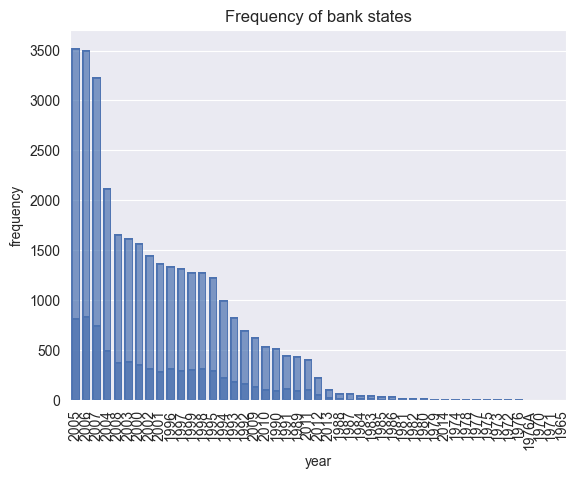

In [29]:
df_dataviz_05 = df_train.groupby("ApprovalFY").size().sort_values(ascending=False).reset_index()
df_dataviz_05.columns = ["year", "frequency"]

fig, ax = plt.subplots()
ax.xaxis.set_tick_params(rotation=90)

p = so.Plot(df_dataviz_05, x="year", y="frequency")\
    .add(so.Bar())\
    .label(title="Frequency of bank states")\
    .layout(size=(12, 4))\
    .on(ax)\
    .plot()

In [34]:
df_train.groupby("NoEmp").size().sort_values(ascending=False)

NoEmp
1       7284
2       6729
3       4692
4       3599
5       2931
        ... 
163        1
162        1
156        1
155        1
9999       1
Length: 208, dtype: int64

In [48]:
df_train.groupby("NewExist").size().sort_values(ascending=False)

NewExist
1.0    29018
2.0    11313
0.0       47
dtype: int64

In [79]:
df_train.groupby("CreateJob").size()

CreateJob
0       28279
1        3656
2        2984
3        1293
4         754
        ...  
452         1
456         1
1011        1
1027        1
8800       12
Length: 95, dtype: int64

In [80]:
df_train.groupby("RetainedJob").size()

RetainedJob
0       15833
1        4482
2        4289
3        3212
4        2458
        ...  
472         1
500         1
550         1
815         1
8800       12
Length: 137, dtype: int64

In [37]:
df_train.groupby("FranchiseCode").size().sort_values(ascending=False)

FranchiseCode
1        27310
0        12084
78760      133
25650       75
68020       66
         ...  
24003        1
54126        1
23379        1
23000        1
47500        1
Length: 313, dtype: int64

In [38]:
df_train.groupby("UrbanRural").size().sort_values(ascending=False)


UrbanRural
1    24160
0    12780
2     3445
dtype: int64

In [39]:
df_train.groupby("RevLineCr").size().sort_values(ascending=False)

RevLineCr
N    17540
Y    13295
0     8671
T      744
dtype: int64

In [40]:
df_train.groupby("LowDoc").size().sort_values(ascending=False)

LowDoc
N    36575
Y     3704
C       16
0       13
A       11
S       10
R        1
dtype: int64

In [41]:
df_train["DisbursementDate"] = pd.to_datetime(df_train["DisbursementDate"])
df_train.groupby("DisbursementDate").size().sort_values(ascending=False)

DisbursementDate
2005-10-31    512
2007-02-28    509
2006-03-31    462
2006-04-30    441
2006-11-30    422
             ... 
1997-02-15      1
1997-02-11      1
1997-02-07      1
1997-02-06      1
2072-12-27      1
Length: 2387, dtype: int64

In [42]:
df_train["DisbursementDate_Year"] = df_train["DisbursementDate"].dt.year
df_train["DisbursementDate_Month"] = df_train["ApprovalDate"].dt.month

df_train.groupby(["DisbursementDate_Year", "DisbursementDate_Month"]).size().sort_index(ascending=False)

DisbursementDate_Year  DisbursementDate_Month
2072.0                 12                        1
                       11                        1
                       5                         1
                       4                         1
2071.0                 12                        1
                                                ..
1974.0                 3                         2
1973.0                 10                        2
                       9                         1
                       8                         1
                       3                         2
Length: 448, dtype: int64

In [43]:
df_train["DisbursementGross_Extracted"] = df_train["DisbursementGross"]\
    .str.extract("(\d+(?:,\d+)*(?:\.\d+)?)")[0]\
    .str.replace(",", "")\
    .astype("float")
df_train["DisbursementGross_Extracted"]

0         350000.0
1          35000.0
2          50000.0
3         190000.0
4          30000.0
           ...    
40380      50000.0
40381    1666600.0
40382      25000.0
40383      73363.0
40384      50000.0
Name: DisbursementGross_Extracted, Length: 40385, dtype: float64

In [44]:
df_train[["DisbursementGross", "DisbursementGross_Extracted"]]

,DisbursementGross,DisbursementGross_Extracted
0,"$350,000.00",350000.0
1,"$35,000.00",35000.0
2,"$50,000.00",50000.0
3,"$190,000.00",190000.0
4,"$30,000.00",30000.0
...,...,...
40380,"$50,000.00",50000.0
40381,"$1,666,600.00",1666600.0
40382,"$25,000.00",25000.0
40383,"$73,363.00",73363.0


In [45]:
df_train["DisbursementGross_Bin"] = pd.qcut(df_train["DisbursementGross_Extracted"], 10, labels=range(10))
df_train.groupby(["DisbursementGross_Bin"]).size().sort_index(ascending=False)

DisbursementGross_Bin
9    3885
8    3834
7    4308
6    2878
5    4886
4    4440
3    4038
2    3404
1    4351
0    4361
dtype: int64

In [46]:
df_train.groupby(["BalanceGross"]).size().sort_index(ascending=False)

BalanceGross
$0.00     40385
dtype: int64

In [47]:
df_train.groupby(["Accept"]).size().sort_index(ascending=False)

Accept
1    32161
0     8224
dtype: int64

In [237]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, \
    FunctionTransformer, MinMaxScaler


def to_lowercase(df):
    """
    set all strings to lower case to be easier to group
    """
    df_return = df.apply(lambda col: col.str.lower())
    return df_return

def limit_outlier(df, max_value):
    """
    clamps the max and min value of a series, for prevent outliers
    from destroying statistic values
    """
    df_return = df.clip(0, max_value)
    return df_return

def fix_new_exists(df):
    """
    fixes newExists col to boolean values
    """
    mask = df.iloc[:, 0] == 0
    df[mask] = 1
    return df

def fix_franchise_code(df):
    """
    fixes FranchiseCode to {0, 1}
    """
    df["FranchiseCode"] = df["FranchiseCode"].apply(lambda row: 0 if row <= 1 else 1)
    return df

def fix_revlinecr(df):
    """
    fixes RevLineCr to {0, 1}
    """
    df["RevLineCr"] = df["RevLineCr"].apply(lambda row: 0 if row in ["N", 0] else 1)
    return df

def fix_lowdoc(df):
    """
    fixes LowDoc to {0, 1}
    """
    df["LowDoc"] = df["LowDoc"].apply(lambda row: 1 if row in ["Y", "S"] else 0)
    return df


def fix_disbursment_gross(df):
    """
    fixes LowDoc to {0, 1}
    """
    df["DisbursementGross"] = df_train["DisbursementGross"]\
        .str.extract("(\d+(?:,\d+)*(?:\.\d+)?)")[0]\
        .str.replace(",", "")\
        .astype("float")
    return df



preprocessor = ColumnTransformer(
    transformers=[

        # group 1 -> Set to lower and onehot with in freq 3
        ("group_a", Pipeline([
            ("a1", FunctionTransformer(to_lowercase)),
            ("a2", OneHotEncoder(min_frequency=3, handle_unknown='ignore'))
        ]), ["Name"]),

        # group 2 -> Set to lower and onehot with in freq 300
        ("group_b", Pipeline([
            ("b1", FunctionTransformer(to_lowercase)),
            ("b2", OneHotEncoder(min_frequency=300, handle_unknown='ignore'))
        ]), ["City", "Bank", "BankState"]),

        # group 3 -> clamps values [0, 155] and scales in standard dist
        # si se quiere cambiar por otras opciones crear una función como la de abajo...
        ("group_c", Pipeline([
            ("c1", FunctionTransformer(limit_outlier, kw_args={'max_value': 155})),
            ("c2", StandardScaler()),
        ]), ["NoEmp"]),

        # group 4 -> sustituye {0, 1, 2} por {1, 2}
        ("group_d", Pipeline([
            ("d1", FunctionTransformer(fix_new_exists)),
        ]), ["NewExist"]),

        # group 5 -> clamps values [0, 1027] and scales in standard dist
        # si se quiere cambiar por otras opciones crear una función como la de abajo...
        ("group_e", Pipeline([
            ("e1", FunctionTransformer(limit_outlier, kw_args={'max_value': 1027})),
            ("e2", StandardScaler()),
        ]), ["CreateJob"]),

        # group 6 -> transforma la columna a bool
        ("group_f", Pipeline([
            ("f1", FunctionTransformer(fix_franchise_code)),
        ]), ["FranchiseCode"]),

        # group 7 -> transforma la columna a bool
        ("group_g", Pipeline([
            ("g1", FunctionTransformer(fix_revlinecr)),
        ]), ["RevLineCr"]),

        # group 8 -> transforma la columna a bool
        ("group_h", Pipeline([
            ("h1", FunctionTransformer(fix_lowdoc)),
        ]), ["LowDoc"]),

        # group 9 -> extrae el valor con un regex y lo escala
        ("group_i", Pipeline([
            ("i1", FunctionTransformer(fix_disbursment_gross)),
            ("i2", StandardScaler()),
        ]), ["DisbursementGross"]),
    ]
)

preprocessor_label = LabelEncoder()


preprocessor.fit(df_train)
preprocessor_label.fit(df_train["Accept"])

LabelEncoder()

https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/

In [239]:
X = preprocessor.transform(df_train)
y = preprocessor_label.transform(df_train["Accept"])

In [241]:
print(X.toarray()[0])
print(y[0])

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         